In [8]:
from __future__ import division
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import itertools
from scipy import stats

In [16]:
def plot_clusters(locations, nb_clusters):
    plt.figure(figsize=(8,5))
    km = KMeans(n_clusters=nb_clusters,
           init='k-means++',
           n_init=10,
           max_iter=1000,
           tol=1e-04,
           random_state=0)
    y_km = km.fit_predict(locations)
    
    color = itertools.cycle(('lightblue', 'hotpink', 'orange', 'mediumseagreen', 'dodgerblue', 'pink', 'maroon', 'gray', 'yellow', 'gold','blue'))
    marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', 's', 'p', 'D', '|'))
    for i in range(0, nb_clusters):
        plt.scatter(locations[y_km==i,0],
                   locations[y_km==i,1],
                   color=color.next(),
                   s=50,
                   marker=marker.next(),
                   label='Cluster '+str(i+1))

    plt.scatter(km.cluster_centers_[:,0],
               km.cluster_centers_[:,1],
               color='red',
               s=250,
               marker='*',
               label='Centroids')

    plt.title('Clusters')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid()
    plt.show()
    return y_km

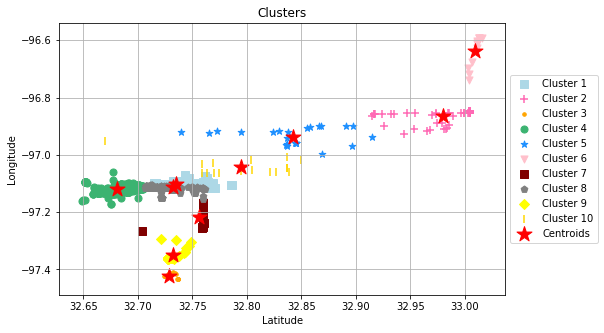

In [17]:
data = pd.read_csv('neelabh_data.csv')
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index('datetime')
df = data['2017-04-27':'2017-01-23']

coordinates = df[['LATITUDE', 'LONGITUDE']]
coordinates_matrix = coordinates.as_matrix()
clusters = plot_clusters(coordinates_matrix, 10)
clusters = clusters + 1 #Because originally cluster id start from 0, to make it interactive we add 1 for cluster 0 to be cluster 1and so on...

df2 = pd.DataFrame(index=df.index)
df2['clusterID'] = clusters
df3 = pd.concat([df, df2], axis=1) #Data Frame that contains datetime, coordinates and cluster id
df3.to_csv('neelabh_data_with_clusters.csv')

In [15]:
df3.head(100)

,LATITUDE,LONGITUDE,clusterID
datetime,,,
2017-04-27 18:01:54,32.733402,-97.113254,1
2017-04-27 17:58:30,32.733626,-97.109255,1
2017-04-27 09:54:03,32.733423,-97.103172,1
2017-04-27 09:49:10,32.733399,-97.103327,1
2017-04-26 22:55:31,32.733014,-97.103329,1
2017-04-26 22:49:26,32.733418,-97.103237,1
2017-04-26 22:49:20,32.733371,-97.103218,1
2017-04-26 22:34:11,32.730247,-97.104818,1
2017-04-26 22:22:54,32.733663,-97.112438,1


In [4]:
data = pd.read_csv('neelabh_data.csv')
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index('datetime')
df = data['2017-04-27':'2017-01-23']

In [5]:
data.head()

,LATITUDE,LONGITUDE
datetime,,
2017-05-22 11:44:39,32.733305,-97.113762
2017-05-22 10:17:28,32.733303,-97.113548
2017-05-22 10:16:12,32.733736,-97.112267
2017-05-22 10:13:47,32.733708,-97.110273
2017-05-22 10:10:07,32.733605,-97.107041


In [6]:
df3.head()

,LATITUDE,LONGITUDE,clusterID
datetime,,,
2017-04-27 18:01:54,32.733402,-97.113254,8
2017-04-27 17:58:30,32.733626,-97.109255,8
2017-04-27 09:54:03,32.733423,-97.103172,1
2017-04-27 09:49:10,32.733399,-97.103327,1
2017-04-26 22:55:31,32.733014,-97.103329,1


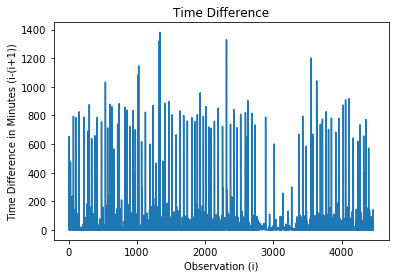

In [33]:
timediff = []
for datetime in range(0, len(df3)-1):
    out = pd.Timedelta(df3.index[datetime] - df3.index[datetime+1]).seconds / 60.0
    timediff.append(out)
timediff = np.array(timediff)
timeStats = stats.describe(timediff)
plt.plot(timediff)
plt.xlabel('Observation (i)')
plt.ylabel('Time Difference in Minutes (i-(i+1))')
plt.title('Time Difference')
plt.show()
plt.show()

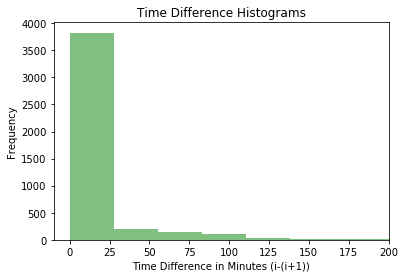

In [38]:
plt.hist(timediff, 50, color='green', label='Time Difference', alpha=0.5)
plt.xlim([-10, 200])
plt.xlabel('Time Difference in Minutes (i-(i+1))')
plt.ylabel('Frequency')
plt.title('Time Difference Histograms')
plt.show()

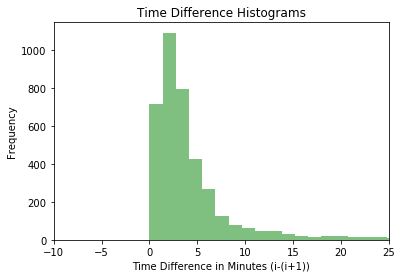

In [41]:
plt.hist(timediff, 1000, color='green', label='Time Difference', alpha=0.5)
plt.xlim([-10, 25])
plt.xlabel('Time Difference in Minutes (i-(i+1))')
plt.ylabel('Frequency')
plt.title('Time Difference Histograms')
plt.show()

In [42]:
df3

,LATITUDE,LONGITUDE,clusterID
datetime,,,
2017-04-27 18:01:54,32.733402,-97.113254,1
2017-04-27 17:58:30,32.733626,-97.109255,1
2017-04-27 09:54:03,32.733423,-97.103172,1
2017-04-27 09:49:10,32.733399,-97.103327,1
2017-04-26 22:55:31,32.733014,-97.103329,1
2017-04-26 22:49:26,32.733418,-97.103237,1
2017-04-26 22:49:20,32.733371,-97.103218,1
2017-04-26 22:34:11,32.730247,-97.104818,1
2017-04-26 22:22:54,32.733663,-97.112438,1
